# Analysis

1) Fox News has the most negative sentiment, while CBS has the most positive.
2) The majority of tweets were neutral.
3) The Sources for the majority of the tweets were from two sources: SocialFlow, and Twitter Web Client.

In [184]:
import tweepy
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
output_data_file = "Output/tweets.csv"

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [169]:
target_users = ("BBC", "CBS", "CNN", "FoxNews", "nytimes")
sentiment_array = []
tweet_texts = []
tweettimes = []
tweet_source = []

for target in target_users:
    
    compound_lista = []
    positive_list = []
    negative_list = []
    neutral_list = []

    for x in range(5):
    
        public_tweets = api.user_timeline(target, page=x)
        
        for tweet in public_tweets:
        
            raw_time = tweet["created_at"]
            resultsa = analyzer.polarity_scores(tweet["text"])
            compounda = resultsa["compound"]
            posa = resultsa["pos"]
            nega = resultsa["neg"] 
            neua = resultsa["neu"]

            tweet_texts.append(tweet["text"])
            tweet_source.append(tweet["source"])
            compound_lista.append(compounda)
            positive_list.append(posa)
            negative_list.append(nega)
            neutral_list.append(neua)
            tweettimes.append(tweet["created_at"])
            
            
      
    sentiment = {
            "User": target,
            "Compound": (compound_lista),
            "Positive": (positive_list),
            "Neutral": (negative_list),
            "Negative": (neutral_list),
            "Tweet Count": len(compound_lista)
                }

In [30]:
BBC = "BBC"
BBC_tweets = []
compound_list = []
tweet_times = []
pos_list = []
neg_list = []
neu_list = []
max_tweets = 100


In [47]:
for x in range(5):
    
    BBC_tweets = api.user_timeline(BBC, page=x)
    
    for tweet in BBC_tweets:
                  
        raw_time = tweet["created_at"]
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neg = results["neg"] 
        neu = results["neu"]
        
        if len(compound_list) < max_tweets:
    
            compound_list.append(compound)
            pos_list.append(pos)
            neg_list.append(neg)
            neu_list.append(neu)
            tweet_times.append(tweet["created_at"])

In [18]:
BBC_objects  = []
for x in range(len(tweet_times)):

    y = x
    
    BBC_objects.append(y)

In [19]:
CBS = "CBS"
CBS_tweets = []
compound_list2 = []
tweet_times2 = []
compound_list = []
pos_list2 = []
neg_list2 = []
neu_list2 = []

for x in range(5):
    
    CBS_tweets = api.user_timeline(CBS, page=x)
    
    for tweet in CBS_tweets:
    
        raw_time2 = tweet["created_at"]
        results2 = analyzer.polarity_scores(tweet["text"])
        compound2 = results2["compound"]
        
        if len(compound_list) < max_tweets:
        
            compound_list2.append(compound2)
            pos_list2.append(pos)
            neg_list2.append(neg)
            neu_list2.append(neu)
            tweet_times2.append(tweet["created_at"])

CBS_mean = np.mean(compound_list2)

In [20]:
CNN = "CNN"
CNN_tweets = []
compound_list3 = []
tweet_times3 = []
compound_list3 = []
pos_list3 = []
neg_list3 = []
neu_list3 = []

for x in range(5):
    
    CNN_tweets = api.user_timeline(CNN, page=x)
    
    for tweet in CNN_tweets:
    
        raw_time3 = tweet["created_at"]
        results3 = analyzer.polarity_scores(tweet["text"])
        compound3 = results3["compound"]
        
        if len(compound_list) < max_tweets:
        
            compound_list3.append(compound3)
            pos_list3.append(pos)
            neg_list3.append(neg)
            neu_list3.append(neu)
            tweet_times3.append(tweet["created_at"])

CNN_mean = np.mean(compound_list3)

In [21]:
FoxNews = "FoxNews"
FoxNews_tweets = []
compound_list4 = []
tweet_times4 = []
compound_list4 = []
pos_list4 = []
neg_list4 = []
neu_list4 = []
for x in range(5):
    
    FoxNews_tweets = api.user_timeline(FoxNews, page=x)
    
    for tweet in FoxNews_tweets:
    
        raw_time4 = tweet["created_at"]
        results4 = analyzer.polarity_scores(tweet["text"])
        compound4 = results4["compound"]
        
        if len(compound_list) < max_tweets:
        
            compound_list4.append(compound4)
            pos_list4.append(pos)
            neg_list4.append(neg)
            neu_list4.append(neu)
            tweet_times4.append(tweet["created_at"])

FoxNews_mean = np.mean(compound_list4)
FoxNews_mean

-0.13948799999999997

In [74]:
nytimes = "nytimes"
nytimes_tweets = []
compound_list5 = []
tweet_times5 = []
pos_list5 = []
neg_list5 = []
neu_list5 = []

for x in range(5):
    
    nytimes_tweets = api.user_timeline(nytimes, page=x)
    
    for tweet in nytimes_tweets:
    
        raw_time5 = tweet["created_at"]
        results5 = analyzer.polarity_scores(tweet["text"])
        compound5 = results5["compound"]
        
        
        
        compound_list5.append(compound5)
        pos_list5.append(pos)
        neg_list5.append(neg)
        neu_list5.append(neu)
        tweet_times5.append(tweet["created_at"])

nytimes_mean = np.mean(compound_list5)

In [177]:
averages = (BBC_mean, CBS_mean, CNN_mean, FoxNews_mean, nytimes_mean)
compounds = (compound_list + compound_list2 + compound_list3 + compound_list4 + compound_list5)
positives = (pos_list + pos_list2 + pos_list3 + pos_list4 + pos_list5)
neutral = (neu_list + neu_list2 + neu_list3 + neu_list4 + neu_list5)
negatives = (neg_list + neg_list2 + neg_list3 + neg_list4 + neg_list5)

In [179]:
dicty = {'text' : tweet_texts,
        'date' : tweettimes,
        'source' : tweet_source,
        'Compound' : compounds,
        'Positive' : positives,
        'Neutral' : neutral,
        'Negative' : negatives}

df = pd.DataFrame(dicty)
df

,Compound,Negative,Neutral,Positive,date,source,text
0,0.0000,0.000,1.000,0.000,Sun Mar 18 20:30:11 +0000 2018,"<a href=""http://www.radian6.com"" rel=""nofollow...","🏃💪 @LesDennis, @SimplySusannah, @Tameka_Empson..."
1,0.0258,0.086,0.824,0.090,Sun Mar 18 20:03:04 +0000 2018,"<a href=""http://www.radian6.com"" rel=""nofollow...",👎💌 Fans of K-Pop boyband member @IBGDRGN have ...
2,0.5994,0.000,0.803,0.197,Sun Mar 18 19:33:04 +0000 2018,"<a href=""http://www.radian6.com"" rel=""nofollow...","Saoirse Ronan stars as Eilis, a young girl who..."
3,-0.5994,0.163,0.837,0.000,Sun Mar 18 18:44:02 +0000 2018,"<a href=""http://www.radian6.com"" rel=""nofollow...",Ruth Ellis was only 28 when she became the las...
4,0.2040,0.077,0.772,0.151,Sun Mar 18 18:34:14 +0000 2018,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @BBC_TopGear: 840bhp goes a little like thi...
5,0.7331,0.000,0.660,0.340,Sun Mar 18 17:18:12 +0000 2018,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","RT @bbcthree: Be honest, do you think you'll b..."
6,0.0000,0.000,1.000,0.000,Sun Mar 18 17:04:03 +0000 2018,"<a href=""http://www.radian6.com"" rel=""nofollow...",🍎🗑 How much food do you throw away? If you're ...
7,0.0000,0.000,1.000,0.000,Sun Mar 18 16:33:17 +0000 2018,"<a href=""http://www.radian6.com"" rel=""nofollow...",❤️️📸Zun Lee wants his photography to give a ba...
8,0.0000,0.000,1.000,0.000,Sun Mar 18 15:41:04 +0000 2018,"<a href=""http://www.radian6.com"" rel=""nofollow...",🤰 A doctor explains why you can get pregnant a...
9,0.0772,0.000,0.947,0.053,Sun Mar 18 14:33:07 +0000 2018,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @BBCEngland: A number of runners have held ...


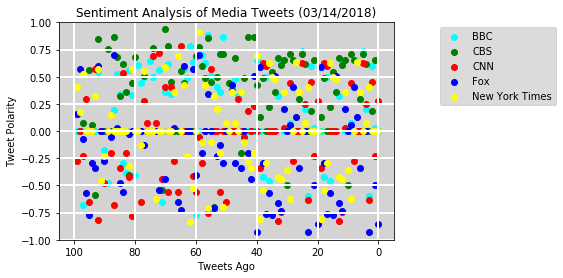

In [59]:
plt.scatter(BBC_objects,
           compound_list,
           c="cyan")
plt.scatter(BBC_objects,
           compound_list2,
           c="green")
plt.scatter(BBC_objects,
           compound_list3,
           c="red")
plt.scatter(BBC_objects,
           compound_list4,
           c="blue")
plt.scatter(BBC_objects,
           compound_list5,
           c="yellow")

plt.xlim(105,-5,-1)   
plt.ylim(-1,1,-.5)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title("Sentiment Analysis of Media Tweets (03/14/2018)")
plt.grid(color='w', linestyle='-', linewidth=2)
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.legend(('BBC', 'CBS', 'CNN', 'Fox', 'New York Times'),
           loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()

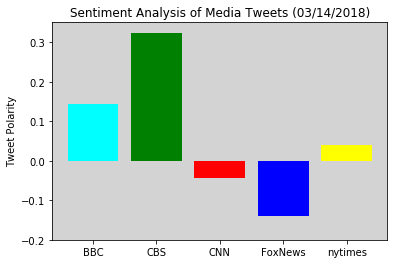

In [119]:
plt.bar(target_users, averages, color=['cyan', 'green', 'red', 'blue', 'yellow'])     
plt.ylim(-.2,.35,-.05)
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (03/14/2018)")


plt.show()

In [185]:
df.to_csv(output_data_file, index_label="Tweet")